In [145]:
"""
Author: Fangda Wang

These codes are written to replicate various types of equilibrium in the 
endogenous credit cycle model proposed by gu et al., 2013

Reference:

Gu, C., Mattesini, F., Monnet, C., & Wright, R. (2013). Endogenous credit cycles. 
Journal of Political Economy, 121(5), 940-965
"""

import matplotlib.pyplot as plt
import numpy as np
from sympy import Symbol, diff
from scipy.optimize import fsolve, minimize

class EndCreditCycles:
    
    def __init__(self, beta=0.4, pi_lam=6, gamma=2.1, alpha=0):
        # store parameters
        self.beta, self.pi_lam, self.gamma, self.alpha = beta, pi_lam, gamma, alpha
    
    # utility functions for two types of agents, equation (15)
    def U_1(self, x, y):
        beta, pi_lam, gamma, alpha = self.beta, self.pi_lam, self.gamma, self.alpha
        return x**(1 - alpha) /(1 - alpha) -y
    
    def U_2(self, y, x):
        beta, pi_lam, gamma, alpha = self.beta, self.pi_lam, self.gamma, self.alpha
        return y - x**(1 + gamma) / (1 + gamma)
    
    # their partial derivatives wrt x and y
    def U_1x(self, x, y):
        a, b = Symbol('a'), Symbol('b')
        return diff(self.U_1(a, b), a).evalf(subs={a: x})
    
    def U_1y(self, x, y):
        a, b = Symbol('a'), Symbol('b')
        return diff(self.U_1(a, b), b).evalf(subs={b: y})
    
    def U_2x(self, y, x):
        b, a = Symbol('b'), Symbol('a')
        return diff(self.U_2(b, a), a).evalf(subs={a: x})
    
    def U_2y(self, x, y):
        b, a = Symbol('b'), Symbol('a')
        return diff(self.U_2(b, a), b).evalf(subs={b: y})
    
    # two foc for two types, equation (9) and (10)
    def foc_1(self, x, y):
        return self.U_1x(x, y) * x + self.U_1y(x, y) * y
    
    def foc_2(self, y, x):
        return self.U_2x(y, x) * x + self.U_2y(y, x) * y
    
    # minimize the sum of squares to get unconstrained allocation
    def sum_square(self, z):
        x = z[0]
        y = z[1]
        return self.foc_1(x, y)**2 + self.foc_2(y, x)**2
    
    def unc_alloc(self):
        return minimize(self.sum_square, [1.1, 1.1]).x[0], minimize(self.sum_square, [1.1, 1.1]).x[1]
    
    # get the impilict function form foc_2 when debt limit binds
    def h(self, phi):
        def foc_2phi(x):
            return self.foc_2(phi, x)
        return fsolve(foc_2phi, 1)[0]
    # and the constrained allocation is
    def con_alloc(self, phi):
        return self.h(phi), phi
    
    # given debt limit, we can compute corresponding allocation
    def allocation(self, phi):
        if phi < self.unc_alloc()[1]:
            return self.con_alloc(phi)
        else:
            return self.unc_alloc()
    # forward-looking debt limit dynamics:
    # phi_t-1 = f (phi_t)
    def f(self, phi):
        beta, pi_lam, gamma, alpha = self.beta, self.pi_lam, self.gamma, self.alpha
        if phi < self.unc_alloc()[1]:
            return beta * pi_lam * self.U_1(self.h(phi), phi) + beta * phi
        else:
            return beta * pi_lam * self.U_1(self.unc_alloc()[0], self.unc_alloc()[1]) + beta * phi
    

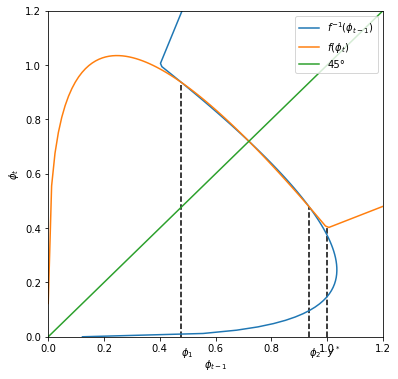

In [177]:
# replicate figure 3a
ECC=EndCreditCycles(beta=0.4, pi_lam=6, gamma=2.1, alpha=0)

# first, compute the 2-period cycles
def residual_sum_2(phi):
    return (ECC.f(ECC.f(phi)) - phi)**2
phi1 = minimize(residual_sum_2, 0.4).x
phi2 = minimize(residual_sum_2, 0.9).x

Phi = np.linspace(0.0001, 1.2, 100)
Phi0 = []
for phi in Phi:
    p = ECC.f(phi)
    Phi0.append(p)
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Phi0, Phi, label=r"$f^{-1}(\phi_{t-1})$")
ax.plot(Phi, Phi0, label=r"$f(\phi_t)$")
ax.plot(Phi, Phi, label="45°")
ax.vlines(phi1, 0, phi2, 'black', '--')
ax.vlines(phi2, 0, phi1, 'black', '--')
ax.vlines(1, 0, 0.4, 'black', '--')
ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)
ax.set_xlabel(r"$\phi_{t-1}$")
ax.set_ylabel(r"$\phi_t$")
ax.text(phi1, -0.07, r"$\phi_1$")
ax.text(phi2, -0.07, r"$\phi_2$")
ax.text(1, -0.07, r"$y^*$")
ax.legend(loc='upper right')
plt.show()

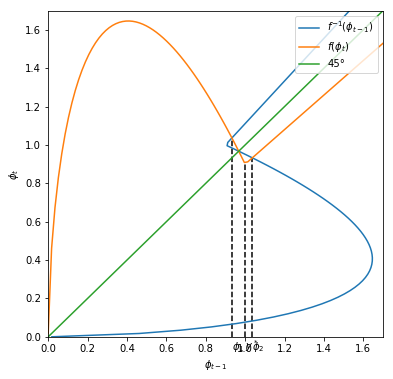

In [180]:
# replicate figure 3b
ECC=EndCreditCycles(beta=0.9, pi_lam=10, gamma=0.5, alpha=0)

# first, compute the 2-period cycles
def residual_sum_2(phi):
    return (ECC.f(ECC.f(phi)) - phi)**2
phi1 = minimize(residual_sum_2, 0.85).x
phi2 = minimize(residual_sum_2, 1.1).x

Phi = np.linspace(0.0001, 1.7, 100)
Phi0 = []
for phi in Phi:
    p = ECC.f(phi)
    Phi0.append(p)
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(Phi0, Phi, label=r"$f^{-1}(\phi_{t-1})$")
ax.plot(Phi, Phi0, label=r"$f(\phi_t)$")
ax.plot(Phi, Phi, label="45°")
ax.vlines(phi1, 0, phi2, 'black', '--')
ax.vlines(phi2, 0, phi1, 'black', '--')
ax.vlines(1, 0, 0.9, 'black', '--')
ax.set_xlim(0, 1.7)
ax.set_ylim(0, 1.7)
ax.set_xlabel(r"$\phi_{t-1}$")
ax.set_ylabel(r"$\phi_t$")
ax.text(phi1, -0.07, r"$\phi_1$")
ax.text(phi2, -0.07, r"$\phi_2$")
ax.text(1, -0.07, r"$y^*$")
ax.legend(loc='upper right')
plt.show()

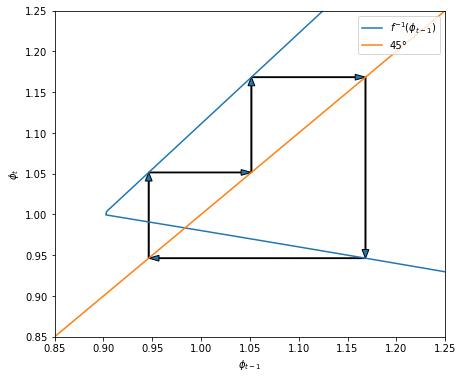

In [222]:
# replicate figrue 4a
ECC=EndCreditCycles(beta=0.9, pi_lam=15, gamma=0.8, alpha=0)

# compute the 3-period cycles
def residual_sum_3(phi):
    return (ECC.f(ECC.f(ECC.f(phi))) - phi)**2
phi1 = minimize(residual_sum_3, 0.94).x[0]
phi2 = ECC.f(phi1)
phi3 = ECC.f(phi2)

Phi = np.linspace(0.85, 1.25, 100)
Phi0 = []
for phi in Phi:
    p = ECC.f(phi)
    Phi0.append(p)
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(Phi0, Phi, label=r"$f^{-1}(\phi_{t-1})$")
ax.plot(Phi, Phi, label="45°")
ax.legend(loc='upper right')
ax.set_xlim(0.85, 1.25)
ax.set_ylim(0.85, 1.25)
plt.arrow(phi1, phi1, 0, phi3-phi1, length_includes_head=True, head_width=0.007)
plt.arrow(phi1, phi3, phi3-phi1, 0, length_includes_head=True, head_width=0.007)
plt.arrow(phi3, phi3, 0, phi2-phi3, length_includes_head=True, head_width=0.007)
plt.arrow(phi3, phi2, phi2-phi3, 0, length_includes_head=True, head_width=0.007)
plt.arrow(phi2, phi2, 0, phi1-phi2, length_includes_head=True, head_width=0.007)
plt.arrow(phi2, phi1, phi1-phi2, 0, length_includes_head=True, head_width=0.007)
ax.set_xlabel(r"$\phi_{t-1}$")
ax.set_ylabel(r"$\phi_t$")
plt.show()